# TODO

* Analisar o casamento dos itinerários no código:
    Itinerários com maiores diferenças: 161,248,255
    
* Validar a saída: investigar porque existe mais de uma linha com horários iguais.

# Bus Trips Analysis
## Questões
1 - Qual a diferença entre o embarque no primeiro e o segundo ? 
2 - Considerando a baldeação qual a quantidade de viagens em que a diferença entre o primeiro e o segundo ônibus é maior que 70 minutos ?
3 - Qual o horário em que as baldeações ultrapassam 70 minutos ?
4 - Quais são as provavéis causas para os atrasos ? O período de descanso dos motoristas(intervalo) influencia nos atrasos ? Nos horários de pico existem atrasos ? Nestes mesmos horários a quantidade de ônibus aumenta ?

Importação de depêndencias

In [1]:
#Libraries

#Python Libs
import sys
import os
import glob
import traceback
from datetime import datetime
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


#Data Analysis Libs
import pandas as pd
import numpy as np

Importação de arquivo csv e visualização das principais colunas

In [2]:
bus_itineraries = pd.read_csv('data/output/output_2019_02_01.csv')
bus_itineraries

,otp_user_trip_id,otp_itinerary_id,otp_leg_id,otp_mode,otp_route,bt_bus_code,bt_trip_num,otp_from_stop_id,otp_start_time,bt_start_time,sched_obs_start_timediff,otp_to_stop_id,otp_end_time,bt_end_time,sched_obs_end_timediff,otp_duration_mins,bt_duration_mins
0,491551.0,1,1,WALK,NaN,NaN,NaN,NaN,2019-02-02 05:18:45,NaN,NaN,NaN,2019-02-02 05:18:46,NaN,NaN,0.016667,NaN
1,491551.0,1,2,BUS,944,1052.0,14.0,491551.0,2019-02-02 05:18:47,2019-02-01 22:17:27,0 days 07:01:20.000000000,386521.0,2019-02-02 05:48:31,2019-02-01 22:59:18,0 days 06:49:13.000000000,29.733333,41.850000
2,491551.0,1,3,BUS,220,1082.0,15.0,386521.0,2019-02-02 05:56:33,2019-02-01 21:03:05,0 days 08:53:28.000000000,386259.0,2019-02-02 06:20:43,2019-02-01 21:15:21,0 days 09:05:22.000000000,24.166667,12.266667
3,491551.0,1,4,BUS,055,2040.0,6.0,386162.0,2019-02-02 06:10:23,2019-02-01 22:27:32,0 days 07:42:51.000000000,497492.0,2019-02-02 06:11:45,2019-02-01 22:28:39,0 days 07:43:06.000000000,1.366667,1.116667
4,491551.0,1,5,WALK,NaN,NaN,NaN,NaN,2019-02-02 06:09:10,NaN,NaN,NaN,2019-02-02 06:09:22,NaN,NaN,0.200000,NaN
5,491551.0,2,1,WALK,NaN,NaN,NaN,NaN,2019-02-02 05:53:45,NaN,NaN,NaN,2019-02-02 05:53:46,NaN,NaN,0.016667,NaN
6,491551.0,2,2,BUS,944,1052.0,14.0,491551.0,2019-02-02 05:53:47,2019-02-01 22:17:27,0 days 07:36:20.000000000,386521.0,2019-02-02 06:23:31,2019-02-01 22:59:18,0 days 07:24:13.000000000,29.733333,41.850000
7,491551.0,2,3,BUS,245,1096.0,4.0,385784.0,2019-02-02 06:33:01,2019-02-01 21:08:35,0 days 09:24:26.000000000,491287.0,2019-02-02 06:41:44,2019-02-01 21:16:58,0 days 09:24:46.000000000,8.716667,8.383333
8,491551.0,2,4,BUS,333,1004.0,11.0,703787.0,2019-02-02 06:25:36,2019-02-01 23:15:54,0 days 07:09:42.000000000,385753.0,2019-02-02 06:31:55,2019-02-01 23:25:04,0 days 07:06:51.000000000,6.316667,9.166667
9,491551.0,2,5,WALK,NaN,NaN,NaN,NaN,2019-02-02 06:41:05,NaN,NaN,NaN,2019-02-02 06:43:34,NaN,NaN,2.483333,NaN


In [3]:
#dropped = bus_itineraries.drop_duplicates(keep='first',subset=['otp_leg_id','otp_mode','otp_route','bt_bus_code','bt_trip_num', 'otp_from_stop_id','otp_start_time','bt_start_time',
                #'sched_obs_start_timediff','otp_to_stop_id','otp_end_time','bt_end_time','sched_obs_end_timediff'])

#dropped

In [4]:
#groupped1 = dropped.groupby(['otp_user_trip_id','otp_itinerary_id']).filter(lambda g: len(g.otp_leg_id) == 5)
#groupped1

In [5]:


#grouped = groupped1.groupby(['otp_user_trip_id','otp_itinerary_id']) \
 #                                   .agg({'otp_leg_id': lambda x: len(x) < 5})

In [6]:
bus_itineraries[['otp_itinerary_id',"otp_leg_id","otp_mode", "otp_start_time","otp_end_time", "bt_start_time","bt_end_time", "bt_duration_mins"]].head()

,otp_itinerary_id,otp_leg_id,otp_mode,otp_start_time,otp_end_time,bt_start_time,bt_end_time,bt_duration_mins
0,1,1,WALK,2019-02-02 05:18:45,2019-02-02 05:18:46,NaN,NaN,NaN
1,1,2,BUS,2019-02-02 05:18:47,2019-02-02 05:48:31,2019-02-01 22:17:27,2019-02-01 22:59:18,41.850000
2,1,3,BUS,2019-02-02 05:56:33,2019-02-02 06:20:43,2019-02-01 21:03:05,2019-02-01 21:15:21,12.266667
3,1,4,BUS,2019-02-02 06:10:23,2019-02-02 06:11:45,2019-02-01 22:27:32,2019-02-01 22:28:39,1.116667
4,1,5,WALK,2019-02-02 06:09:10,2019-02-02 06:09:22,NaN,NaN,NaN


In [7]:
#filtered_sched_obs_start_time = bus_itineraries.sched_obs_start_timediff.dropna()
#mean = filtered_sched_obs_start_time.apply(lambda x: np.mean(x))
#parsed_sched_obs_start_time = filtered_sched_obs_start_time.apply(lambda x : x/pd.Timedelta('1m'))

#filtered_sched_obs_end_time = bus_itineraries.sched_obs_end_timediff.dropna()
#mean = filtered_sched_obs_start_time.apply(lambda x: np.mean(x))
#parsed_sched_obs_end_time = filtered_sched_obs_end_time.apply(lambda x : x/pd.Timedelta('1m'))

#diff_trip_time = parsed_sched_obs_end_time - parsed_sched_obs_start_time

#diff_trip_time

## Duração total da viagem observada

In [8]:
bt_duration_mins = bus_itineraries.bt_duration_mins.dropna()

In [9]:
bt_duration_mins.describe()

count    118.000000
mean      20.186299
std       16.248067
min        1.116667
25%        8.383333
50%       12.266667
75%       41.850000
max       50.450000
Name: bt_duration_mins, dtype: float64

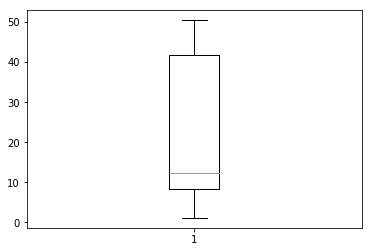

In [10]:
plt.boxplot(bt_duration_mins)
plt.show()

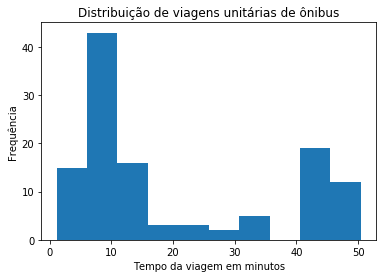

<Figure size 720x360 with 0 Axes>

In [11]:
plt.hist(bt_duration_mins)
plt.title(u'Distribuição de viagens unitárias de ônibus')
plt.xlabel(u'Tempo da viagem em minutos')
plt.ylabel(u'Frequência')
plt.figure(figsize=(10,5))
plt.show()

In [12]:
df = bus_itineraries

In [13]:
df.groupby(['otp_user_trip_id']).apply(lambda x: str(x['bt_start_time']))
#df.groupby(['otp_user_trip_id']).apply(lambda x: pd.to_datetime(x['bt_start_time']))
df.bt_start_time.dtype
df.size


3621

In [14]:
df.columns

Index([u'otp_user_trip_id', u'otp_itinerary_id', u'otp_leg_id', u'otp_mode',
       u'otp_route', u'bt_bus_code', u'bt_trip_num', u'otp_from_stop_id',
       u'otp_start_time', u'bt_start_time', u'sched_obs_start_timediff',
       u'otp_to_stop_id', u'otp_end_time', u'bt_end_time',
       u'sched_obs_end_timediff', u'otp_duration_mins', u'bt_duration_mins'],
      dtype='object')

In [15]:
df

,otp_user_trip_id,otp_itinerary_id,otp_leg_id,otp_mode,otp_route,bt_bus_code,bt_trip_num,otp_from_stop_id,otp_start_time,bt_start_time,sched_obs_start_timediff,otp_to_stop_id,otp_end_time,bt_end_time,sched_obs_end_timediff,otp_duration_mins,bt_duration_mins
0,491551.0,1,1,WALK,NaN,NaN,NaN,NaN,2019-02-02 05:18:45,NaN,NaN,NaN,2019-02-02 05:18:46,NaN,NaN,0.016667,NaN
1,491551.0,1,2,BUS,944,1052.0,14.0,491551.0,2019-02-02 05:18:47,2019-02-01 22:17:27,0 days 07:01:20.000000000,386521.0,2019-02-02 05:48:31,2019-02-01 22:59:18,0 days 06:49:13.000000000,29.733333,41.850000
2,491551.0,1,3,BUS,220,1082.0,15.0,386521.0,2019-02-02 05:56:33,2019-02-01 21:03:05,0 days 08:53:28.000000000,386259.0,2019-02-02 06:20:43,2019-02-01 21:15:21,0 days 09:05:22.000000000,24.166667,12.266667
3,491551.0,1,4,BUS,055,2040.0,6.0,386162.0,2019-02-02 06:10:23,2019-02-01 22:27:32,0 days 07:42:51.000000000,497492.0,2019-02-02 06:11:45,2019-02-01 22:28:39,0 days 07:43:06.000000000,1.366667,1.116667
4,491551.0,1,5,WALK,NaN,NaN,NaN,NaN,2019-02-02 06:09:10,NaN,NaN,NaN,2019-02-02 06:09:22,NaN,NaN,0.200000,NaN
5,491551.0,2,1,WALK,NaN,NaN,NaN,NaN,2019-02-02 05:53:45,NaN,NaN,NaN,2019-02-02 05:53:46,NaN,NaN,0.016667,NaN
6,491551.0,2,2,BUS,944,1052.0,14.0,491551.0,2019-02-02 05:53:47,2019-02-01 22:17:27,0 days 07:36:20.000000000,386521.0,2019-02-02 06:23:31,2019-02-01 22:59:18,0 days 07:24:13.000000000,29.733333,41.850000
7,491551.0,2,3,BUS,245,1096.0,4.0,385784.0,2019-02-02 06:33:01,2019-02-01 21:08:35,0 days 09:24:26.000000000,491287.0,2019-02-02 06:41:44,2019-02-01 21:16:58,0 days 09:24:46.000000000,8.716667,8.383333
8,491551.0,2,4,BUS,333,1004.0,11.0,703787.0,2019-02-02 06:25:36,2019-02-01 23:15:54,0 days 07:09:42.000000000,385753.0,2019-02-02 06:31:55,2019-02-01 23:25:04,0 days 07:06:51.000000000,6.316667,9.166667
9,491551.0,2,5,WALK,NaN,NaN,NaN,NaN,2019-02-02 06:41:05,NaN,NaN,NaN,2019-02-02 06:43:34,NaN,NaN,2.483333,NaN


In [16]:
bus_itineraries[['otp_itinerary_id',"otp_leg_id","otp_mode", "otp_start_time","otp_end_time", "bt_start_time","bt_end_time", 
                 "bt_duration_mins", "bt_bus_code"]].head()

,otp_itinerary_id,otp_leg_id,otp_mode,otp_start_time,otp_end_time,bt_start_time,bt_end_time,bt_duration_mins,bt_bus_code
0,1,1,WALK,2019-02-02 05:18:45,2019-02-02 05:18:46,NaN,NaN,NaN,NaN
1,1,2,BUS,2019-02-02 05:18:47,2019-02-02 05:48:31,2019-02-01 22:17:27,2019-02-01 22:59:18,41.850000,1052.0
2,1,3,BUS,2019-02-02 05:56:33,2019-02-02 06:20:43,2019-02-01 21:03:05,2019-02-01 21:15:21,12.266667,1082.0
3,1,4,BUS,2019-02-02 06:10:23,2019-02-02 06:11:45,2019-02-01 22:27:32,2019-02-01 22:28:39,1.116667,2040.0
4,1,5,WALK,2019-02-02 06:09:10,2019-02-02 06:09:22,NaN,NaN,NaN,NaN


In [17]:
bus_itineraries.describe

<bound method DataFrame.describe of      otp_user_trip_id  otp_itinerary_id  otp_leg_id otp_mode otp_route  \
0            491551.0                 1           1     WALK       NaN   
1            491551.0                 1           2      BUS       944   
2            491551.0                 1           3      BUS       220   
3            491551.0                 1           4      BUS       055   
4            491551.0                 1           5     WALK       NaN   
5            491551.0                 2           1     WALK       NaN   
6            491551.0                 2           2      BUS       944   
7            491551.0                 2           3      BUS       245   
8            491551.0                 2           4      BUS       333   
9            491551.0                 2           5     WALK       NaN   
10           491551.0                 3           1     WALK       NaN   
11           491551.0                 3           2      BUS       944   
12

###Encontrando tempo total de um itinerário

In [18]:
itinerary_id = df.otp_itinerary_id.iloc[0] #recuperando ID da primeira linha
#gerar index out bounds
times = []
start_time_first_bus = []
start_time_second_bus = []
count = 0

for i in range(len(df)-2):
    row = df.iloc[i]
#     if (row.otp_leg_id >= 3):
#         print "aa"
    
    # considerando somente a primeira leg par de cada itinerário para cálculo do tempo de 'baldeação'
    if (row.otp_leg_id % 2 == 0 and row.otp_itinerary_id == itinerary_id 
        and df.otp_itinerary_id.iloc[i+2] == itinerary_id):
            times.append( pd.to_datetime(df.bt_start_time.iloc[i+2]) -  pd.to_datetime(df.bt_start_time.iloc[i]))
            start_time_first_bus.append(df.bt_start_time.iloc[i])
            start_time_second_bus.append(df.bt_start_time.iloc[i+2])
            
            #imprime os itinerários com maiores horários de "baldeação"
            if (pd.to_datetime(df.bt_start_time.iloc[i+2]) -  pd.to_datetime(df.bt_start_time.iloc[i]) > timedelta(minutes=100)):
                count = count+1
                print(row.otp_itinerary_id)
                
            
    itinerary_id = row.otp_itinerary_id
print count

0


In [19]:
times

[Timedelta('0 days 00:10:05'),
 Timedelta('0 days 00:58:27'),
 Timedelta('0 days 00:06:26'),
 NaT,
 Timedelta('-1 days +23:41:14'),
 NaT,
 Timedelta('-1 days +22:22:35'),
 NaT,
 Timedelta('-1 days +23:41:14'),
 NaT,
 Timedelta('0 days 00:49:21'),
 NaT,
 Timedelta('-1 days +23:45:10'),
 NaT,
 Timedelta('0 days 00:58:27'),
 NaT,
 Timedelta('0 days 00:49:21'),
 NaT,
 Timedelta('-1 days +23:45:10'),
 Timedelta('0 days 00:58:27'),
 Timedelta('0 days 00:49:21'),
 Timedelta('0 days 00:58:27'),
 Timedelta('0 days 00:49:21'),
 Timedelta('0 days 00:10:05'),
 NaT,
 NaT,
 Timedelta('0 days 00:58:27'),
 NaT,
 Timedelta('-1 days +22:22:35'),
 NaT,
 Timedelta('0 days 00:49:21'),
 NaT,
 Timedelta('-1 days +23:45:10'),
 Timedelta('0 days 00:44:42'),
 Timedelta('0 days 00:58:27'),
 Timedelta('0 days 00:58:27'),
 NaT,
 Timedelta('-1 days +22:48:02'),
 Timedelta('-1 days +22:53:16'),
 Timedelta('0 days 00:49:21'),
 Timedelta('0 days 00:49:21'),
 NaT,
 Timedelta('0 days 00:49:21'),
 Timedelta('-1 days +22:

In [20]:
diff_bus_trips = pd.DataFrame(data=times)
type(diff_bus_trips)

pandas.core.frame.DataFrame

In [21]:
teste = pd.DataFrame({
    'horarios': times,
    'primeiro_onibus': start_time_first_bus,
    'segundo_onibus': start_time_second_bus
})


scheduled_bus_times2 = teste.iloc[::2]
scheduled_bus_times2.dropna()
scheduled_bus_times2.head()

,horarios,primeiro_onibus,segundo_onibus
0,00:10:05,2019-02-01 22:17:27,2019-02-01 22:27:32
2,00:06:26,2019-02-01 22:17:27,2019-02-01 22:23:53
4,-1 days +23:41:14,2019-02-01 22:17:27,2019-02-01 21:58:41
6,-1 days +22:22:35,2019-02-01 22:17:27,2019-02-01 20:40:02
8,-1 days +23:41:14,2019-02-01 22:17:27,2019-02-01 21:58:41


In [22]:
#bus_itineraries[['otp_itinerary_id',"otp_leg_id","otp_mode", "bt_start_time"]].tail(50)

In [23]:
#retira horário em que a diferença é negativa
zero_hora = '00:10:05'
bus_times = diff_bus_trips
#bus_times = diff_bus_trips.iloc[::2]
bus_times.columns = ['horarios']
bus_times = bus_times.loc[bus_times['horarios'] > zero_hora]
bus_times.dropna()
bus_times.head()

,horarios
1,00:58:27
10,00:49:21
14,00:58:27
16,00:49:21
19,00:58:27


In [24]:
#bus_times.to_csv('/bus_times.csv', index=False)

In [25]:
bus_times.describe()

,horarios
count,20
mean,0 days 00:49:29.150000
std,0 days 00:11:55.210920
min,0 days 00:10:23
25%,0 days 00:49:21
50%,0 days 00:49:21
75%,0 days 00:58:27
max,0 days 00:58:27


In [26]:
bus_times.dtypes

horarios    timedelta64[ns]
dtype: object

In [27]:
times_plot = bus_times.astype('timedelta64[m]').plot.hist(alpha = 0.8, figsize=(10,5),  color="orange")
times_plot.set_xlabel("Tempo em minutos")
times_plot.set_ylabel("Frequência")
times_plot.set_title("Distribuição do tempo das 'baldeações'")

Text(0.5,1,"Distribui\xc3\xa7\xc3\xa3o do tempo das 'baldea\xc3\xa7\xc3\xb5es'")

Error in callback <function post_execute at 0x7fc2c59d5c08> (for post_execute):


ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 720x360 with 1 Axes>

In [28]:
density_bus_times = bus_times.astype('timedelta64[m]').plot.density(figsize=(10,5))
density_bus_times.set_xlabel("Tempo em minutos")
density_bus_times.set_ylabel("Densidade")
density_bus_times.set_title("Gráfico de densidade")

Text(0.5,1,'Gr\xc3\xa1fico de densidade')

Error in callback <function post_execute at 0x7fc2c59d5c08> (for post_execute):


ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 720x360 with 1 Axes>

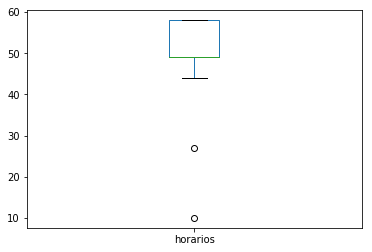

In [29]:
bus_times.astype('timedelta64[m]').plot.box()

##Análise sobre a integração temporal

- Quantos itinerários o  tempo entre embarcar no primeiro ônibuse e realizar a baldeação é menor que 70 minutos ?  

Número total de horários de ônibus após validação

In [30]:
bus_times.size

20

In [31]:
gte_70min = bus_times[bus_times.horarios > timedelta(minutes=70)]
lte_70min = bus_times[bus_times.horarios <= timedelta(minutes=70)]

Número total de itinerários que o tempo entre o primeiro e o segundo ônibus é maior que 70 minutos:

In [32]:
gte_70min.size

0

Número total de itinerários que o tempo entre o primeiro e o segundo ônibus é menor que 70 minutos:

In [33]:
lte_70min.size

20

In [34]:
#porcentagem de ônibus que estouram os 70 minutos para a integração temporal
percentage_gte = gte_70min.size / bus_times.size
percentage_gte * 100

0

In [35]:
trips_gte70 = gte_70min.astype('timedelta64[m]').plot.hist(alpha = 0.8, figsize=(10,5),  color="orange")
trips_gte70.set_xlabel("Tempo em minutos")
trips_gte70.set_ylabel("Frequência")
trips_gte70.set_title("Distribuição do tempo de espera maior que 70 minutos")

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
gte_70min.astype('timedelta64[m]').plot.box(figsize=(10,5))